In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

911 emergency calls from Montgomery County (Pennsylvania-USA) from December-2015 to July-2020
EMS stands for Emergency Medical Squads

```911 Emergency Calls Dataset. This dataset contains emergency calls relevant to EMS, traffic, and fire, specified in detail in 88 distinct types of codes. The data is available for 62 municipalities of Montgomery County in the United States for the time period of December-2015 to July-2020. We aggregate the original daily observations to monthly level to overcome the data sparsity, and categorise the 88 codes into EMS, traffic, and fire. In this dataset, we investigate the impact of COVID19 lockdown measures on the 911 emergency calls demand. The COVID19 lockdown restriction measures were put into place from the beginning of January 2020. Therefore, the post-intervention period is set to January-2020 to July-2020, whereas the pre-intervention period is set to December-2015 to December-2019.```

In [5]:
%%time
EMS_raw = pd.read_csv("911.csv") # this is not store in the repo due to its large size
# but you can find it in https://www.kaggle.com/datasets/mchirico/montcoalert
EMS_raw.head()

CPU times: user 1.24 s, sys: 103 ms, total: 1.34 s
Wall time: 1.34 s


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


First stage of preprocessing
1. spliting the variable `title` into `reason` and `code`, and cleaning the from some descriptions.
2. formatting the date information
3. treating the missing data in 'hour' column -> no na, no handling
4. Cleaning the townships from everything different of Montgomery County
    - The number of missings remaining in townships is 293, which corresponds to 0.045% of all records. 
    - From this 293 missings, for 124 of them we have information about the zip, and from these 124 zips, 102 are unique lat/lon/zips. 
    - As the task to fill the `twp` column searching for those 102 lat/lon/zips would be very time consuming, and the amount of those missings are not representative, The author has decided to clean these missings from the dataset.
    - **Should I fill the nan if I still have time after other parts are done?**
5. saving dataframe calls3

In [6]:
%%time
EMS1 = pd.read_csv("calls3.csv") 
EMS1.head()

CPU times: user 2.08 s, sys: 190 ms, total: 2.27 s
Wall time: 2.28 s


,Unnamed: 0,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,code,timeStamp2,date,year,month,dayWeek,dayWeek2,hour,yearMonth
0,1,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10 17:10:52,2015-12-10,2015,12,4,Thursday,17,2015-12
1,2,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10 17:29:21,2015-12-10,2015,12,4,Thursday,17,2015-12
2,3,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10 14:39:21,2015-12-10,2015,12,4,Thursday,14,2015-12
3,4,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10 16:47:36,2015-12-10,2015,12,4,Thursday,16,2015-12
4,5,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10 16:56:52,2015-12-10,2015,12,4,Thursday,16,2015-12


In [8]:
EMS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649696 entries, 0 to 649695
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  649696 non-null  int64  
 1   lat         649696 non-null  float64
 2   lng         649696 non-null  float64
 3   desc        649696 non-null  object 
 4   zip         574587 non-null  float64
 5   title       649696 non-null  object 
 6   timeStamp   649696 non-null  object 
 7   twp         649696 non-null  object 
 8   addr        649696 non-null  object 
 9   e           649696 non-null  int64  
 10  reason      649696 non-null  object 
 11  code        649696 non-null  object 
 12  timeStamp2  649696 non-null  object 
 13  date        649696 non-null  object 
 14  year        649696 non-null  int64  
 15  month       649696 non-null  int64  
 16  dayWeek     649696 non-null  int64  
 17  dayWeek2    649696 non-null  object 
 18  hour        649696 non-null  int64  
 19  ye

In [9]:
# What are the top 5 zipcodes for 911 calls?
EMS1['zip'].value_counts().head(5)

19401.0    45575
19464.0    43851
19403.0    34866
19446.0    32253
19406.0    22441
Name: zip, dtype: int64

In [10]:
# What are the top 5 townships (twp) for 911 calls?
EMS1['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [11]:
# Take a look at the 'title' column, how many unique title codes are there?
EMS1['title'].nunique()

147

In [13]:
# What is the most common Reason for a 911 call based off of this new column?
EMS1['reason'].value_counts()

EMS        325044
Traffic    225686
Fire        98966
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

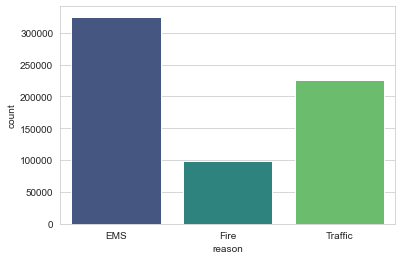

In [15]:
sns.countplot(x='reason',data=EMS1,palette='viridis')

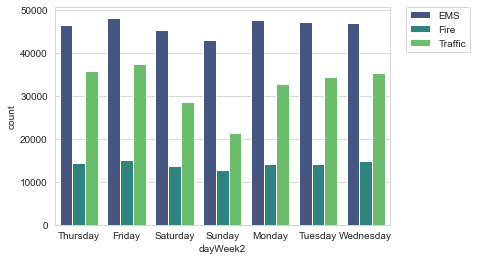

In [16]:
# Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.
sns.countplot(x='dayWeek2',data=EMS1,hue='reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

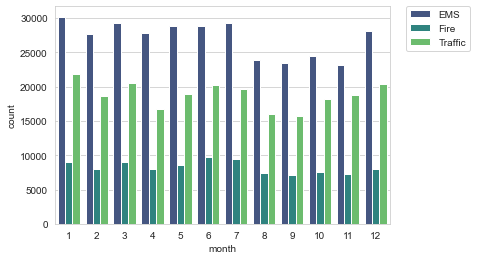

In [17]:
# Now do the same for Month:
sns.countplot(x='month',data=EMS1,hue='reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='hour', ylabel='dayWeek2'>

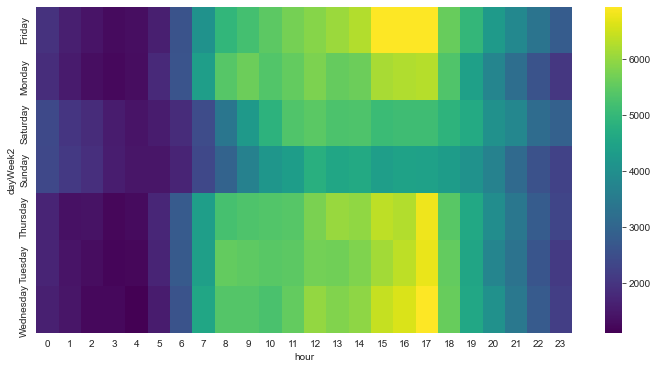

In [18]:
# Create heatmaps with seaborn and our data by using Hours as column and the Day of the Week as the Index
plt.figure(figsize=(12,6))
sns.heatmap(EMS1.groupby(by=['dayWeek2','hour']).count()['reason'].unstack(),cmap='viridis')

In [10]:
# Interesting, working seems to be highly correlated to the amount of 911 calls;)
# According to README for EMS_MC data, training and testing datasets are constructed.
EMS2 = pd.read_csv("./datasets/text_data/calls911/calls911_month_full_reproduced.txt") 
EMS2.head()
# The number of calls per townships and per Year-Month

,twp,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,...,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
0,ABINGTON,514,727,713,668,728,661,674,721,751,...,807,751,796,693,639,575,518,504,685,614
1,AMBLER,49,82,57,63,73,71,81,74,56,...,105,100,80,67,69,82,83,58,105,53
2,BRIDGEPORT,43,71,60,59,53,87,66,55,74,...,90,69,63,66,60,61,44,50,53,65
3,BRYN ATHYN,19,15,18,18,16,24,26,26,14,...,21,19,20,25,15,18,10,14,29,24
4,CHELTENHAM,339,586,548,488,531,511,560,559,572,...,625,558,590,545,482,478,392,425,454,514


In [16]:
EMS2_EDA = pd.melt(EMS2, id_vars='twp', var_name='YearMonth')

In [27]:
EMS2_EDA.head()

,twp,YearMonth,value
0,ABINGTON,2015-12,514
1,AMBLER,2015-12,49
2,BRIDGEPORT,2015-12,43
3,BRYN ATHYN,2015-12,19
4,CHELTENHAM,2015-12,339


The control group for this dataset is the set of townships that implemented lighter (or none) lockdown restriction measures. We identify 12 municipalities from a total of 62 townships, as the control group.

In [17]:
control_list = ["BRIDGEPORT", "BRYN ATHYN", "DOUGLASS", "HATBORO", "HATFIELD BORO", 
                "LOWER FREDERICK", "NEW HANOVER", "NORRISTOWN", "NORTH WALES", "SALFORD", 
                "SPRINGFIELD", "TRAPPE"]

treated_list = ["ABINGTON",  "AMBLER",  "CHELTENHAM",  "COLLEGEVILLE",  "CONSHOHOCKEN", 
                "EAST GREENVILLE",  "EAST NORRITON",  "FRANCONIA" , "GREEN LANE", "HATFIELD TOWNSHIP", 
               "HORSHAM" , "JENKINTOWN",  "LANSDALE",  "LIMERICK",  "LOWER GWYNEDD", 
               "LOWER MERION",  "LOWER MORELAND",  "LOWER POTTSGROVE",  "LOWER PROVIDENCE",  "LOWER SALFORD", 
               "MARLBOROUGH",  "MONTGOMERY",  "NARBERTH",  "PENNSBURG",  "PERKIOMEN", 
               "PLYMOUTH",  "POTTSTOWN",  "RED HILL",  "ROCKLEDGE",  "ROYERSFORD", 
               "SCHWENKSVILLE",  "SKIPPACK",  "SOUDERTON",  "TELFORD",  "TOWAMENCIN", 
               "UPPER DUBLIN",  "UPPER FREDERICK",  "UPPER GWYNEDD",  "UPPER HANOVER",  "UPPER MERION", 
               "UPPER MORELAND",  "UPPER POTTSGROVE",  "UPPER PROVIDENCE",  "UPPER SALFORD",  "WEST CONSHOHOCKEN", 
               "WEST NORRITON",  "WEST POTTSGROVE",  "WHITEMARSH",  "WHITPAIN",  "WORCESTER"]

In [18]:
# treated: 1, controlled: 0
EMS2_EDA['T_C'] = EMS2_EDA['twp'].apply(lambda x: 0 if x in control_list else 1 if x in treated_list else None)
EMS2_EDA.head()

,twp,YearMonth,value,T_C
0,ABINGTON,2015-12,514,1
1,AMBLER,2015-12,49,1
2,BRIDGEPORT,2015-12,43,0
3,BRYN ATHYN,2015-12,19,0
4,CHELTENHAM,2015-12,339,1


In [14]:
EMS2_EDA['T_C'].isna().any()

False

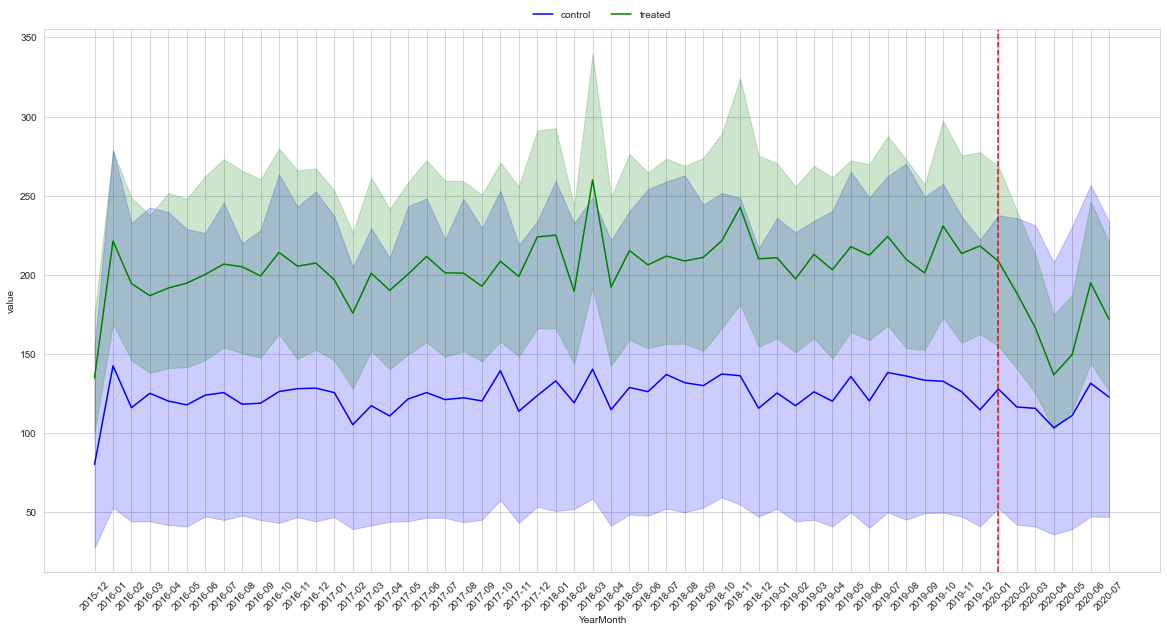

In [19]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)

ax = sns.lineplot(data=EMS2_EDA, x="YearMonth", y="value", hue="T_C", palette={0: 'blue', 1: 'green'})
# Add vertical line at YearMonth = 2020-01
handles, labels = ax.get_legend_handles_labels()
ax.axvline(x="2020-01", color='red', linestyle='--')
new_labels = ['control', 'treated']
ax.legend(handles, new_labels, title=None, frameon=False)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=7, title=None, frameon=False
)

plt.show()

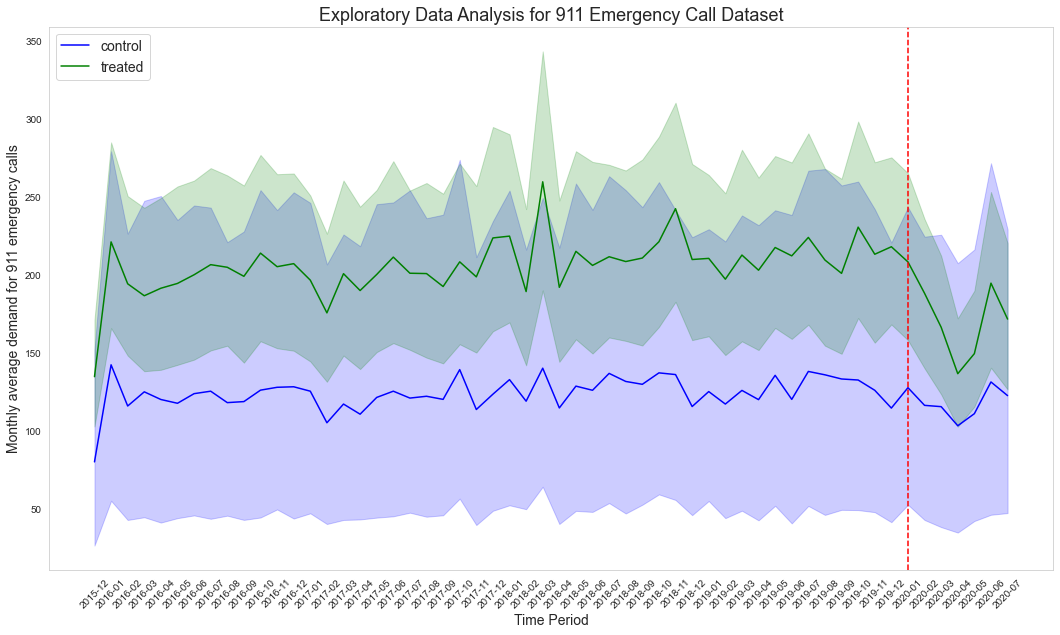

In [30]:
plt.figure(figsize=(18, 10))
plt.xticks(rotation=45)
plt.grid(False)  # Remove grid

ax = sns.lineplot(data=EMS2_EDA, x="YearMonth", y="value", hue="T_C", palette={0: 'blue', 1: 'green'})

# Add title and axis labels
plt.title("Exploratory Data Analysis for 911 Emergency Call Dataset", fontsize=18)
plt.ylabel("Monthly average demand for 911 emergency calls", fontsize=14)
plt.xlabel("Time Period", fontsize=14)

# Add vertical line at YearMonth = 2020-01
ax.axvline(x="2020-01", color='red', linestyle='--')

# Rename legend labels
handles, _ = ax.get_legend_handles_labels()
new_labels = ['control', 'treated']
ax.legend(handles, new_labels, loc='upper left', fontsize=14)

plt.show()
